In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import ensemble, svm, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define CIFAR-10 class names manually
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Reshape the data for easier visualization
images_train = X_train
images_test = X_test

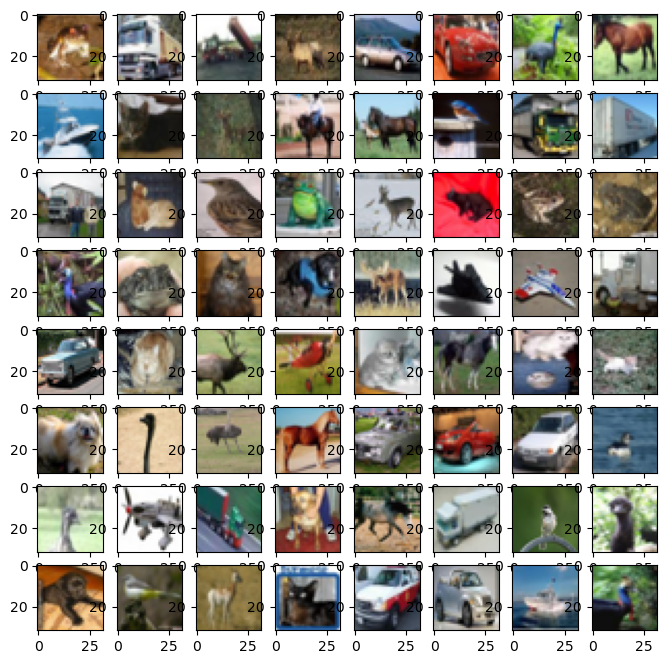

In [2]:
# Visualize the first 64 images in the training set
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(images_train[i], cmap=plt.cm.bone)
plt.show()

# Flatten the image data for PCA
data_train = images_train.reshape(50000, 3072)
data_test = images_test.reshape(10000, 3072)



In [3]:
# Perform PCA on the data
pca = PCA()
pca.fit(data_train)
pca.components_.shape

k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum / total < 0.95:
    currentSum += pca.explained_variance_[k]
    k += 1

pca_t = PCA(n_components=k, whiten=True)
x_transform = pca_t.fit_transform(data_train)
x_transform.shape
x_approx = pca_t.inverse_transform(x_transform)
x_approx = x_approx.reshape((50000, 32, 32, 3))
x_approx.shape
print(pca_t.components_.shape)
eigenv = pca_t.components_.reshape(k, 32, 32, 3)
x_train_pca = x_transform
x_test_pca = pca_t.transform(data_test)


(217, 3072)


In [ ]:
# Random Forest Classifier with GridSearchCV
clf_RF = RandomForestClassifier()
grid_RF = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [5, 10, 20, 30]
}
grid_search_RF = GridSearchCV(clf_RF, grid_RF)
grid_search_RF.fit(x_train_pca, y_train.ravel())
print("Best Random Forest Estimator: ", grid_search_RF.best_estimator_)
print("Best Random Forest Score: ", grid_search_RF.best_score_)

In [ ]:
# SVC with GridSearchCV
clf_SVC = svm.SVC()
grid_SVC = {'C': [1e2, 1e3, 5e3, 1e4],
            'gamma': [1e-3, 5e-4, 1e-4]}
grid_search_SVC = GridSearchCV(clf_SVC, grid_SVC, cv=model_selection.KFold(n_splits=10, shuffle=True, random_state=1))
grid_search_SVC.fit(x_train_pca, y_train.ravel())
print("Best SVC Score: ", grid_search_SVC.best_score_)


In [ ]:

# Decision Tree Classifier with GridSearchCV
clf_DT = DecisionTreeClassifier(criterion="entropy", splitter="best")
grid_DT = {
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'max_depth': [10, 15, 20, 25, 30, 35],
    'min_impurity_decrease': [10 ** -i for i in range(2, 5)]
}
grid_search_DT = GridSearchCV(clf_DT, grid_DT, cv=model_selection.KFold(n_splits=10, shuffle=True, random_state=1))
grid_search_DT.fit(x_train_pca, y_train.ravel())
print("Best Decision Tree Score: ", grid_search_DT.best_score_)
